In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import libraries for plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


In [4]:
crloan_df = pd.read_csv('credit_loan+prob.csv')
crloan_df.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [5]:
crloan_df.shape

(32581, 12)

In [6]:
crloan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
crloan_df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [8]:
crloan_df.loan_grade.nunique()

7

In [9]:
px.box(crloan_df, x='person_age', title='Age visualization')

In [10]:
px.histogram(crloan_df, x='person_income', title='income viz')

In [11]:
px.histogram(crloan_df, x='person_home_ownership', title='home viz', color='loan_status')

In [12]:
px.histogram(crloan_df, x='person_emp_length', title='person_emp_length viz', color='loan_status')

In [13]:
px.histogram(crloan_df, x='cb_person_default_on_file', title='cb_person_default_on_file viz', color='loan_status')

## dividing into Sample, Train,Val,Test data


In [14]:
crloan_df = pd.read_csv('credit_loan+prob.csv')
use_sample = True
sample_fraction = 0.8

if use_sample:
    crloan_df = crloan_df.sample(frac=sample_fraction).copy()
    
crloan_df.shape

(26065, 12)

In [15]:
from sklearn.model_selection import train_test_split
train_val_df, test_df = train_test_split(crloan_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.2, random_state=42)
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)


train_df.shape : (16681, 12)
val_df.shape : (4171, 12)
test_df.shape : (5213, 12)


## Identfying Input and Target columns

In [16]:
input_cols = list(crloan_df.drop('loan_status', axis=1).columns)
target_col = 'loan_status'
input_cols

['person_age',
 'person_income',
 'person_home_ownership',
 'person_emp_length',
 'loan_intent',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_default_on_file',
 'cb_person_cred_hist_length']

In [51]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [52]:
train_targets.value_counts()

loan_status
0    13034
1     3647
Name: count, dtype: int64

## Numerical / categorical data

In [53]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()
numeric_cols

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [54]:
train_inputs[numeric_cols].describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,16681.000000,1.668100e+04,16227.000000,16681.000000,15096.000000,16681.000000,16681.000000
mean,27.734308,6.589681e+04,4.750909,9617.993526,11.006683,0.170736,5.788022
std,6.418230,5.586501e+04,4.129402,6374.230125,3.246218,0.106957,4.062170
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.845000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,7.800000e+04,7.000000,12250.000000,13.470000,0.230000,8.000000
max,144.000000,2.039784e+06,123.000000,35000.000000,23.220000,0.770000,30.000000


In [55]:
train_inputs[categorical_cols].nunique()

person_home_ownership        4
loan_intent                  6
loan_grade                   7
cb_person_default_on_file    2
dtype: int64

## Imputing Missing Numeric data

In [56]:
crloan_df[numeric_cols].isna().sum()

person_age                       0
person_income                    0
person_emp_length              733
loan_amnt                        0
loan_int_rate                 2479
loan_percent_income              0
cb_person_cred_hist_length       0
dtype: int64

In [57]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')
imputer.fit(crloan_df[numeric_cols])  # can check with .statistics_
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])



## Scaling Numeric Features

In [71]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(crloan_df[numeric_cols])
print('Minimum:')
list(scaler.data_min_)

Minimum:


[np.float64(20.0),
 np.float64(4000.0),
 np.float64(0.0),
 np.float64(500.0),
 np.float64(5.42),
 np.float64(0.0),
 np.float64(2.0)]

In [73]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(crloan_df[numeric_cols])
print('Minimum:')
list(scaler.data_min_)

Minimum:


[np.float64(20.0),
 np.float64(4000.0),
 np.float64(0.0),
 np.float64(500.0),
 np.float64(5.42),
 np.float64(0.0),
 np.float64(2.0)]

In [74]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

## Encoding categorical data

In [75]:
crloan_df[categorical_cols].nunique()

person_home_ownership        4
loan_intent                  6
loan_grade                   7
cb_person_default_on_file    2
dtype: int64

In [76]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(crloan_df[categorical_cols])   # encoder.categories
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
pd.set_option('display.max_columns', None)


In [77]:

"""%%time
pip install pyarrow --quiet
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')
train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]"""

"%%time\npip install pyarrow --quiet\ntrain_inputs.to_parquet('train_inputs.parquet')\nval_inputs.to_parquet('val_inputs.parquet')\ntest_inputs.to_parquet('test_inputs.parquet')\n\npd.DataFrame(train_targets).to_parquet('train_targets.parquet')\npd.DataFrame(val_targets).to_parquet('val_targets.parquet')\npd.DataFrame(test_targets).to_parquet('test_targets.parquet')\ntrain_inputs = pd.read_parquet('train_inputs.parquet')\nval_inputs = pd.read_parquet('val_inputs.parquet')\ntest_inputs = pd.read_parquet('test_inputs.parquet')\n\ntrain_targets = pd.read_parquet('train_targets.parquet')[target_col]\nval_targets = pd.read_parquet('val_targets.parquet')[target_col]\ntest_targets = pd.read_parquet('test_targets.parquet')[target_col]"

## Training Model

<Axes: xlabel='weight', ylabel='feature'>

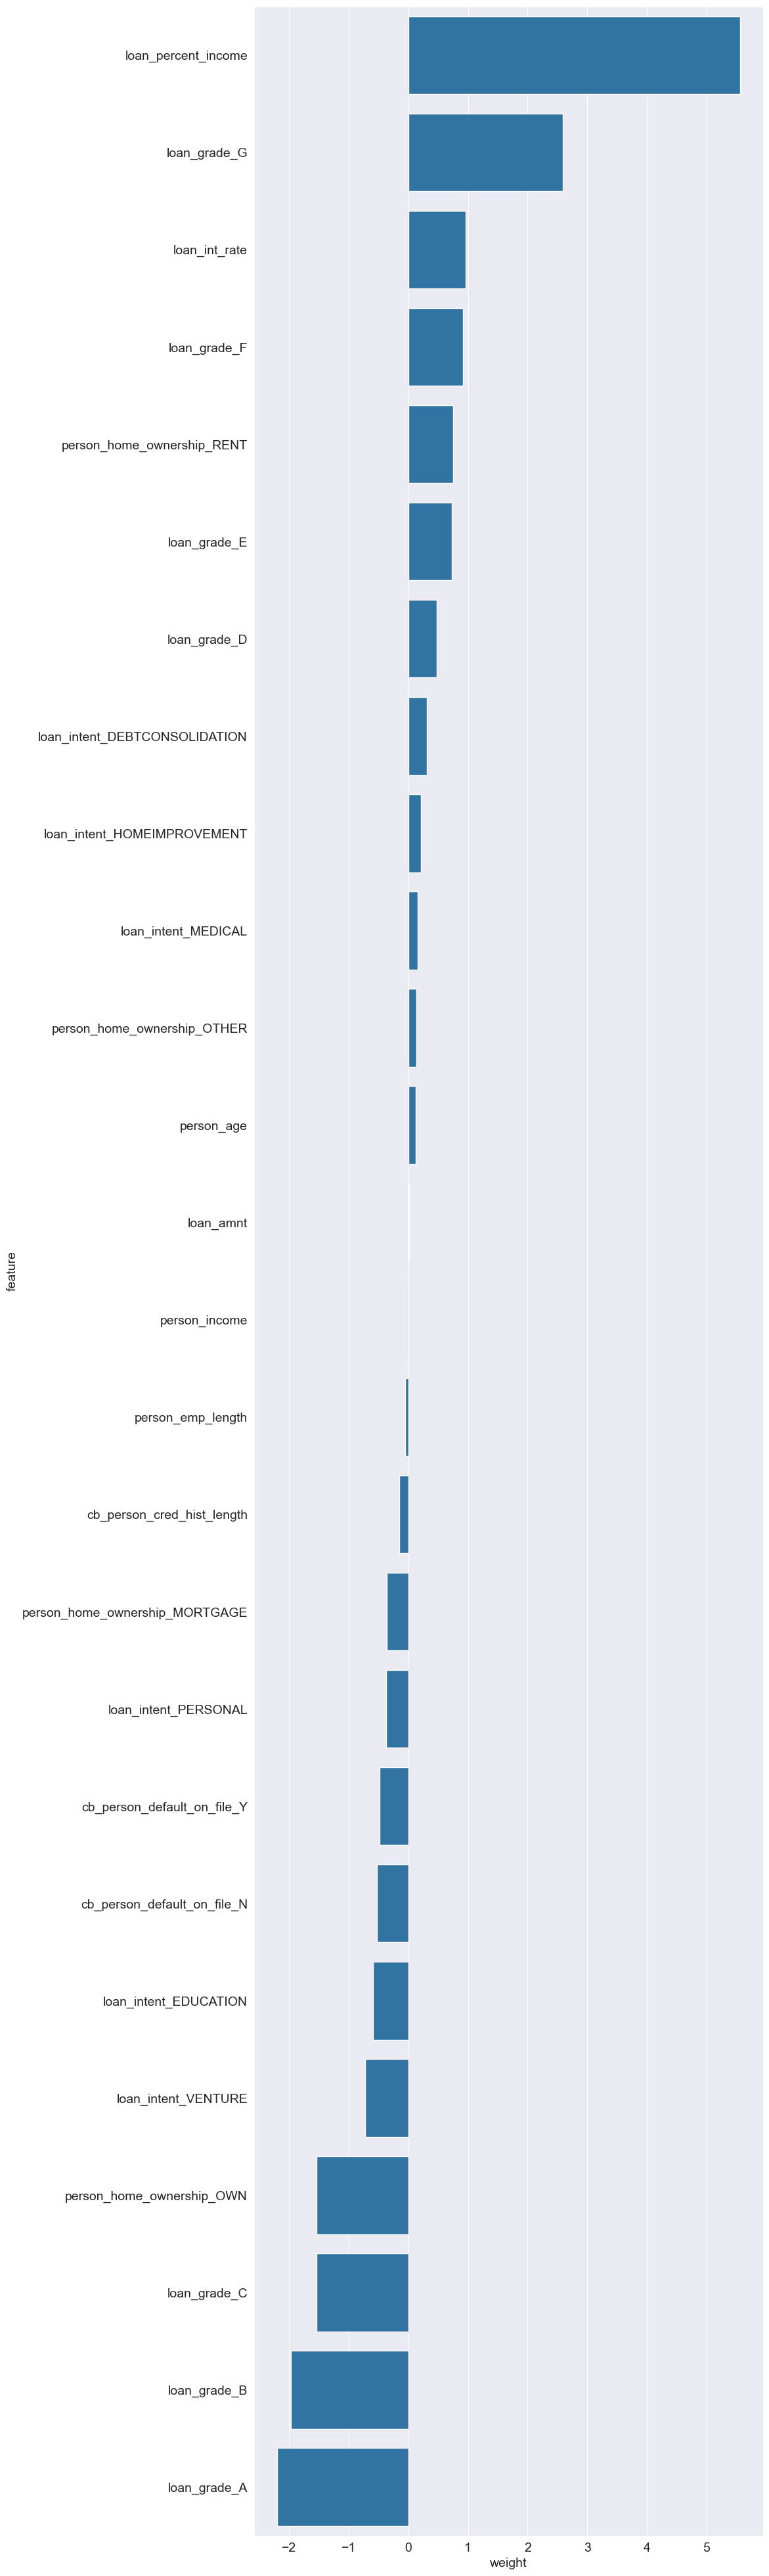

In [78]:


from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

weight_df = pd.DataFrame({
    'feature': (numeric_cols + encoded_cols), 'weight': model.coef_.tolist()[0]
    })
plt.figure(figsize=(10,50)) 

sns.barplot(data=weight_df.sort_values('weight', ascending=False), x='weight', y='feature')


In [79]:
train_inputs.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')

In [80]:
## Making Predictions and Evaluating the model
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

train_preds = model.predict(X_train)

train_probs = model.predict_proba(X_train)
print(train_probs)

# test accuracy
from sklearn.metrics import accuracy_score
accuracy_score(train_targets, train_preds) 

print(X_val.shape)


[[0.85717795 0.14282205]
 [0.77491223 0.22508777]
 [0.88815082 0.11184918]
 ...
 [0.70898026 0.29101974]
 [0.57463395 0.42536605]
 [0.90887463 0.09112537]]
(4171, 26)


In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.95534755, 0.04465245],
       [0.44831368, 0.55168632]])

In [82]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets,preds)
    print("Accuracy: {:.2f}%".format(accuracy*100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));  
    return preds


Accuracy: 86.71%
[0 0 0 ... 0 0 0]


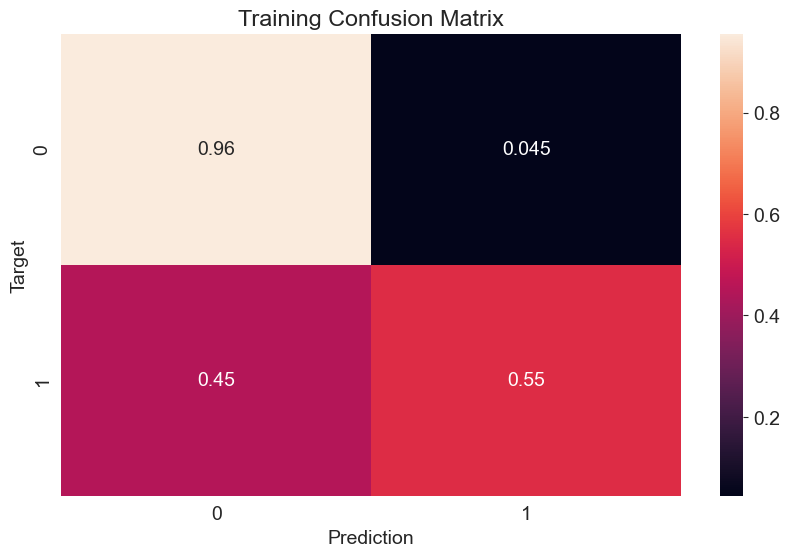

In [83]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')
print(train_preds)

Accuracy: 85.93%


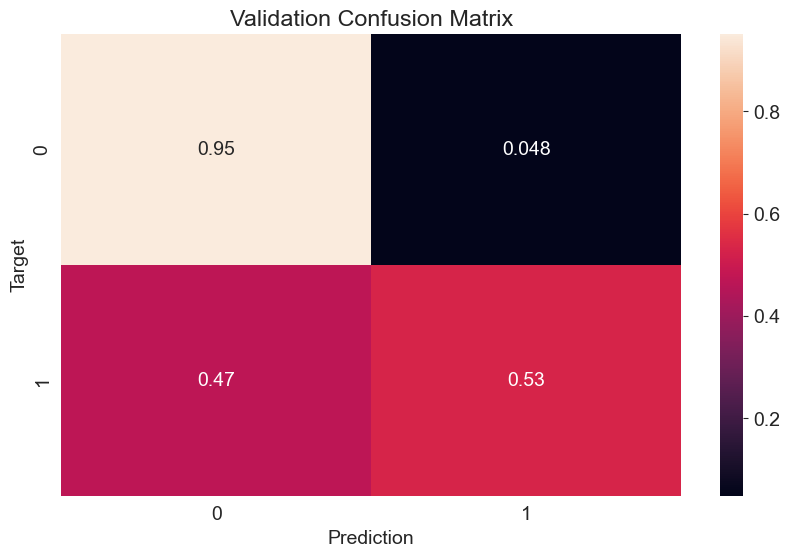

In [84]:
val_preds = predict_and_plot(X_val, val_targets, 'Validation')

Accuracy: 86.07%


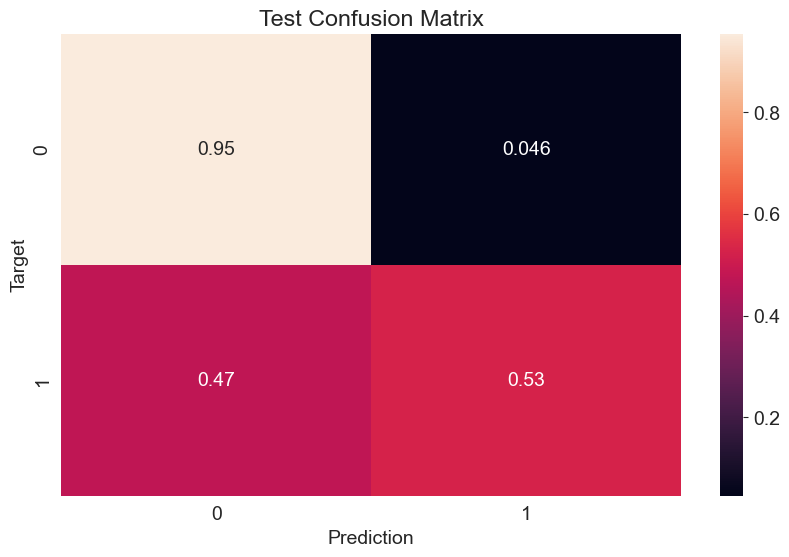

In [85]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

In [ ]:
def random_guess(inputs):
    return np.random.choice([0, 1], len(inputs))
def all_no(inputs):
    return np.full(len(inputs), 0)

In [90]:
accuracy_score(test_targets, random_guess(X_test))

0.500287742183004

In [91]:
accuracy_score(test_targets, all_no(X_test))

0.0

## Making Predictions on a single Input

In [102]:
crloan_df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,26065.000000,2.606500e+04,25332.000000,26065.000000,23586.000000,26065.000000,26065.000000,26065.000000
mean,27.746902,6.569775e+04,4.773843,9566.923077,11.024540,0.218646,0.170245,5.803261
std,6.363332,5.301018e+04,4.110190,6318.620544,3.249247,0.413336,0.106805,4.067546
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.840000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.879200e+04,7.000000,12000.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,2.039784e+06,123.000000,35000.000000,23.220000,1.000000,0.770000,30.000000


In [115]:
new_input = {
    'person_age': 26.5,
    'person_income': 20000,
    'person_home_ownership': 'OWN',
    'person_emp_length': 5,
    'loan_intent': 'EDUCATION',
    'loan_grade': 'G',
    'loan_amnt': 10000,
    'loan_int_rate': 12.5,
    'loan_percent_income': 0.3,
    'cb_person_default_on_file': 'Y',
    'cb_person_cred_hist_length': 1
}

In [116]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob
predict_input(new_input)

(np.int64(1), np.float64(0.8232357659940701))

## Saving and Loading Training Models

In [117]:
import joblib
aussie_rain = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}
joblib.dump(aussie_rain, 'aussie_rain.joblib')

['aussie_rain.joblib']

In [118]:
aussie_rain2 = joblib.load('aussie_rain.joblib')

In [119]:
test_preds2 = aussie_rain2['model'].predict(X_test)
accuracy_score(test_targets, test_preds2)

0.8607327834260503